Каждый пункт, который предлагается выполнить в рамках домашнего задания, имеет объявленную "цену" в баллах. Максимально возможная сумма – 10 баллов, а с учётом бонусных пунктов – 12 баллов. Выполнять все пункты не обязательно, можно сделать только часть. В большинстве пунктов ожидается, что вы напишете работающий код на Python; иногда надо будет писать комментарии в свободной форме – например, сравнивать несколько подходов к решению одной задачи. Там, где оставлены пустые клетки под ваши ответы, вы можете по своему усмотрению добавлять ещё клетки.

* * *

Эта лабораторная работа посвящена кластеризации. Мы будем работать с рукописными изображениями цифр, научимся их кластеризовать двумя разными методами (иерархическая кластеризация и алгоритм $K$-means), оценивать качество разбиения и выбирать оптимальное число кластеров, а также визуализировать промежуточные результаты.

# 1. Получение данных

Данные, с которыми мы будем работать, доступны в библиотеке scikit-learn (модуль называется `sklearn`) в подмодуле `datasets` через функцию, которая называется `load_digits`. Всего имеется 1797 наблюдений, каждое из них представляет чёрно-белую картинку 8 $\times$ 8 пикселей. Эти картинки – распознанные рукописные цифры от 0 до 9. Образцов написания каждой цифры дано приблизительно поровну, около 180.

Для удобства использования данных каждая картинка "развёрнута" в строку, так что NumPy-массив, в котором хранятся данные, имеет размерность 2 и величину 1797 $\times$ 64 (а не, например, размерность 3 и величину 1797 $\times$ 8 $\times$ 8). Интенсивность цвета в каждом пикселе кодируется целым числом от 0 до 16.

Кроме наблюдений (картинок), известны соответствующие им значения целевой переменной: какую цифру на самом деле изображает каждая картинка. Мы могли бы сразу сформулировать задачу обучения с учителем и предсказывать цифры по картинкам, но для целей этой лабораторной работы мы будем действовать по-другому: сделаем вид, что нам не известны истинные метки классов (т. е. цифры) и даже количество классов, и попробуем сгруппировать данные таким образом, чтобы качество кластеризации оказалось наилучшим, а затем посмотрим, насколько точно полученные кластеры совпадают с группами изображений одинаковых цифр.

**(0.5 балла)** Загрузите данные. Добейтесь, чтобы в переменной `X` оказался массив наблюдений, содержащий 1797 $\times$ 64 числа, а в переменной `y` – массив истинных меток классов, содержащий 1797 чисел.

*Указания:*
- Как загрузить данные, объяснено в справке к функции `load_digits`.
- Размер массива хранится в атрибуте `shape`.

(1797, 64)


<Figure size 432x288 with 0 Axes>

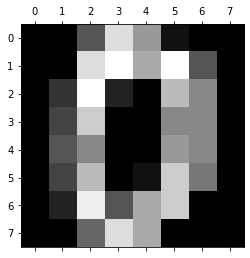

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)


plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] (1797, 64)
[0 1 2 ... 8 9 8] (1797,)


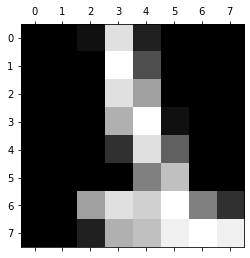

In [2]:

x = digits.data
y = digits.target
print(x, x.shape)
print(y, y.shape)
plt.matshow(digits.images[1000]) 

**(1 балл)** Визуализируйте первые десять картинок, расположив их на сетке 3 $\times$ 4 (в последнем ряду останутся пустые места). Добейтесь, чтобы фон картинок был белым, а изображения цифр – тёмными.

*Указания:*
- Не забудьте импортировать NumPy и Matplotlib.
- Картинки 8 $\times$ 8 можно либо достать готовыми из объекта, загруженного функцией `load_digits`, либо сделать самостоятельно из строк массива `X`. Во втором случае пользуйтесь методом `reshape`.
- Чтобы изображение не было цветным, можно вызвать функцию `plt.gray`, прежде чем начать рисовать.
- Располагать картинки на сетке умеет функция `plt.subplot`. Ознакомьтесь со справкой к ней.
- По умолчанию число 0 кодирует чёрный цвет, а число 16 – белый цвет. Подумайте, как обратить цвета одной операцией над NumPy-массивом.
- Выводить картинку на экран умеет функция `plt.imshow`. Ознакомьтесь со справкой к ней.
- Если считаете нужным, можете отключить сглаживание – параметр `interpolation` у функции `plt.imshow`.
- Если считаете нужным, можете отключить деления на координатных осях. За это отвечают функции `plt.xticks` и `plt.yticks`.

<Figure size 432x288 with 0 Axes>

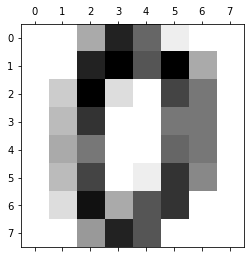

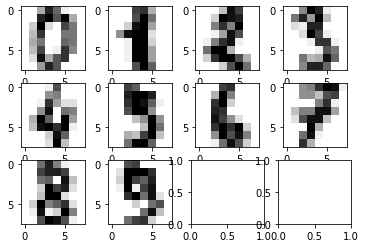

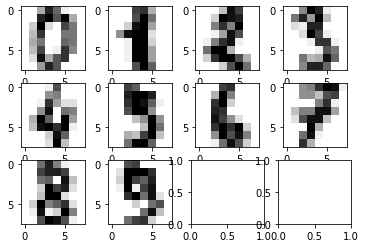

In [3]:
plt.gray() 
#print(digits.images[0])
digits_number = 10
digit_inverse = np.empty(((10, 8, 8)))
for i in range(digits_number):
    digit_inverse[i] = digits.images[i]
#print(digit_inverse[0])
digit_inverse = 16 - digit_inverse
#print(digit_inverse[0])
plt.xticks = 'none'
plt.yticks = 'none'
plt.matshow(digit_inverse[0])
fig, axes = plt.subplots(3,4)
for i in range(digits_number):
    axes[i // 4][i % 4].imshow(digit_inverse[i], interpolation = 'none') 
    axes[i // 4][i % 4].xticks = 'none'
    axes[i // 4][i % 4].yticks = 'none'

# реализуем это же функциеё с использованием reshape
def digits_plot(digits, digits_number = 10):    
    digit_inverse = np.empty(((10, 8, 8)))
    for i in range(digits_number):
        digit_inverse[i] = digits[i].reshape(8, 8)
    digit_inverse = 16 - digit_inverse
    plt.gray() 
    fig, axes = plt.subplots(3,4)
    for i in range(digits_number):
        axes[i // 4][i % 4].imshow(digit_inverse[i], interpolation = 'none') 
        axes[i // 4][i % 4].xticks = 'none'
        axes[i // 4][i % 4].yticks = 'none'
        

digits_plot(x)        

# 2. Кластеризация и оценка качества

Мы будем использовать два популярных алгоритма: иерархическую кластеризацию и метод $K$ средних ($K$-means clustering). Эти и другие алгоритмы кластеризации доступны в библиотеке scikit-learn в подмодуле `cluster`. Иерархическая кластеризация называется `AgglomerativeClustering`, а метод $K$ средних – `KMeans`.

Интерфейс у большинства алгоритмов в scikit-learn простой и единообразный:
- Чтобы инициализировать модель, нужно создать экземпляр соответствующего класса со всеми необходимыми параметрами. Например, у кластеризаций единственный обязательный параметр называется `n_clusters`, это количество кластеров, которое мы хотим получить на выходе.
- Инициализированную модель можно обучить, вызвав метод `fit`.
- С помощью обученной модели можно предсказывать, вызывая метод `predict`.

Как видно, этот интерфейс хорош только для задач обучения с учителем, в которых чётко разделены фазы обучения модели и предсказания с её помощью. У кластеризаций зато есть метод `fit_predict`, который разбивает входную выборку на кластеры и сразу же возвращает результаты разбиения.

**(0.5 балла)** Используя каждый из двух методов, иерархическую кластеризацию и $K$ средних, получите разбиение массива `X` на 10 кластеров.

*Указания:*
- Оба раза должен получиться массив из 1797 чисел – номеров кластеров.
- `KMeans` делает несколько (по умолчанию 10) запусков со случайными центрами и из полученных разбиений выводит лучшее в терминах среднего внутрикластерного расстояния. Чтобы улучшить качество предсказаний, можно увеличить число запусков, например, до 100. Это параметр `n_init` в конструкторе.

In [4]:
from sklearn.cluster import AgglomerativeClustering, KMeans


estimators = [('AgglomerativeClustering_10', AgglomerativeClustering(n_clusters=10)),
              ('k_means_10', KMeans(n_clusters=10)),
              ('k_means_10_n_init_100', KMeans(n_clusters=10, n_init=100,
                                               init='random'))]
y_predict = np.empty((3, 1797))    
i = 0;
for name, est in estimators:
    est.fit(x)
    labels = est.labels_
    print(name, labels.shape, labels)
    y_predict[i] = labels
    i = i + 1 

AgglomerativeClustering_10 (1797,) [7 9 4 ... 4 1 4]
k_means_10 (1797,) [2 3 3 ... 3 6 6]
k_means_10_n_init_100 (1797,) [3 0 0 ... 0 1 1]


**(1 балл)** Визуализируйте центры кластеров, полученных каждым из двух способов. Это опять должны быть картинки на сетке 3 $\times$ 4 с белым фоном и тёмными контурами. Прокомментируйте: какой из двух алгоритмов даёт центры кластеров, больше похожие на типичные начертания цифр?

*Указания:*
- Центр кластера – это среднее по всем наблюдениям, входящим в кластер, т. е. по какому-то набору строк из `X`.
- Чтобы выбрать наблюдения, входящие в кластер номер `i`, используйте индексацию по булевозначной маске. Саму маску можно получить из массива предсказанных номеров кластеров и числа `i` оператором `==`.
- Усреднять NumPy-массив вдоль какой-нибудь из осей умеет функция `np.mean`. Ознакомьтесь со справкой к ней. Нам нужно усреднение по строкам.

[7. 9. 4. ... 4. 1. 4.]
[2. 3. 3. ... 3. 6. 6.]
[3. 0. 0. ... 0. 1. 1.]


<Figure size 432x288 with 0 Axes>

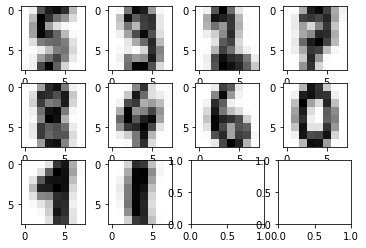

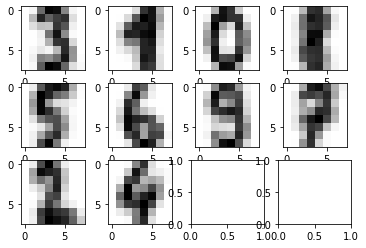

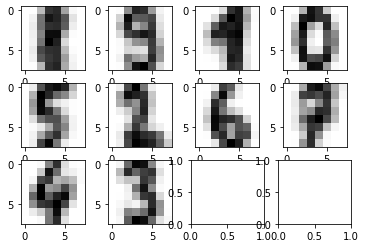

In [5]:
for i in (0,1,2):
    print(y_predict[i])
    cluster_mean = np.empty((10, 64))
    for cluster_n in range(10):
        cluster_matrix = np.dot(np.diag(y_predict[i] == cluster_n), x) 
        cluster_mean[cluster_n] = cluster_matrix.mean(axis = 0)
    digits_plot(cluster_mean)        

В ситуации, когда истинное число кластеров неизвестно, подбирают оптимальное число кластеров. При этом учитывают две величины: внутрикластерное расстояние (чем меньше, тем лучше) и межкластерное расстояние (чем больше, тем лучше). Так как две эти величины не достигают оптимума одновременно, обычно оптимизируют какой-нибудь функционал от них. Один популярный функционал называется "силуэт" (silhouette). Вот как он вычисляется.

Пусть $X$ – множество наблюдений, $M \subset X$ – один из кластеров, на которые оно разбито в результате кластеризации, $\rho$ – метрика на $X$. Выберем какое-нибудь одно наблюдение $x \in M$. Обозначим $a(x)$ среднее расстояние от $x$ до точек $x'$ из того же кластера:
$$
a(x) = \frac{1}{|M| - 1} \sum_{x' \in M,\, x' \ne x} \rho(x,\, x')
$$

Обозначим $b(x)$ минимум средних расстояний от $x$ до точек $x''$ из какого-нибудь другого кластера $N$:
$$
b(x) = \min_{N \ne M} \frac{1}{|N|} \sum_{x'' \in N} \rho(x,\, x'')
$$

Силуэт – это разность межкластерного и внутрикластерного расстояний, нормированная до отрезка $[-1,\, 1]$ и усреднённая по всем наблюдениям:
$$
\frac{1}{|X|} \sum_{x \in X} \frac{b(x) - a(x)}{\max(a(x),\, b(x))}
$$

В scikit-learn силуэт считается функцией `silhouette_score` из подмодуля `metrics`. На вход нужно передать массив наблюдений и результат кластеризации.

**(1.5 балла)** Для числа $K$ от 2 до 20 включительно получите разбиение массива `X` на $K$ кластеров каждым из двух методов. Посчитайте силуэт. Посчитанные значения силуэта сохраните в переменную и визуализируйте в виде графика в координатах: число $K$ – значение силуэта. При каком числе кластеров достигается максимум силуэта?

*Указания:*
- Не забудьте, что функция `range` не захватывает правый конец диапазона.
- Под значения силуэта можно завести два списка: один для иерархической кластеризации, другой для $K$ средних.
- Рисовать графики умеет функция `plt.plot`. Ознакомьтесь со справкой к ней.
- На одной картинке можно разместить несколько графиков, это просто несколько последовательных вызовов `plt.plot`.
- Чтобы добавить легенду (подписи к графикам), можно воспользоваться функцией `plt.legend`. Местоположение легенды контролируется параметром `loc`.
- Чтобы подписать координатные оси, можно воспользоваться функциями `plt.xlabel` и `plt.ylabel`.

In [6]:
from sklearn.metrics import silhouette_score
cluster_number = range(2, 21)
score = np.empty((2, 21))  
for k in cluster_number:
    
    est1 = AgglomerativeClustering(n_clusters=k)
    est2 = KMeans(n_clusters=k, n_init=100,init='random')
    est1.fit(x)
    est2.fit(x)
    labels1 = est1.labels_
    labels2 = est2.labels_
    score[0][k] = silhouette_score(x, labels1)
    score[1][k] = silhouette_score(x, labels2)

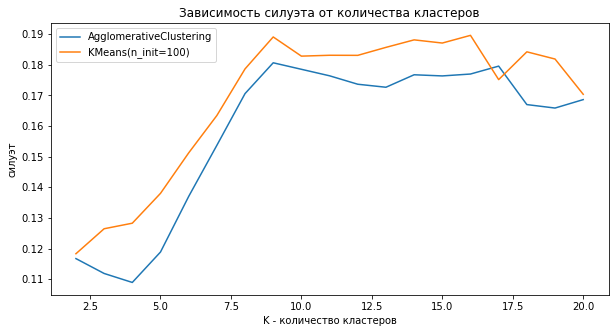

,AgglomerativeClustering,KMeans(n_init=100)
2,0.116740,0.118328
3,0.111890,0.126476
4,0.108960,0.128289
5,0.118881,0.138020
6,0.137011,0.151217
7,0.153686,0.163415
8,0.170563,0.178623
9,0.180620,0.189047
10,0.178497,0.182789
11,0.176373,0.183073


In [7]:
df = pd.DataFrame(np.transpose(score), columns=['AgglomerativeClustering','KMeans(n_init=100)']).iloc[2:, :]
df.head(50)
df.plot(figsize =(10,5), title ='Зависимость силуэта от количества кластеров', xlabel = 'K - количество кластеров', ylabel = 'силуэт')
plt.show()
df.head(50)

При количестве кластеров от 7-9 до 16-18 достигаются максимальные значения силуэта.

Когда известно "правильное" (в каком-нибудь смысле) разбиение на кластеры, результат кластеризации можно сравнить с ним, используя такие меры, как однородность (homogeneity), полнота (completeness) и их среднее гармоническое – $V$-мера. Определения этих величин довольно громоздкие и основаны на понятии [энтропии распределения вероятностей](https://ru.wikipedia.org/wiki/Информационная_энтропия); подробности излагаются в [этой статье](http://aclweb.org/anthology/D/D07/D07-1043.pdf). На практике достаточно знать, что однородность, полнота и $V$-мера заключены между нулём и единицей – чем больше, тем лучше.

Так как мы знаем, какую цифру на самом деле изображает каждая картинка (это массив `y`), мы можем использовать однородность, полноту и $V$-меру для оценки качества кластеризации. Функции для вычисления этих величин доступны в scikit-learn, в подмодуле `metrics`, под названиями `homogeneity_score`, `completeness_score`, `v_measure_score`. Как вариант, можно использовать функцию `homogeneity_completeness_v_measure`, которая возвращает сразу тройку чисел.

**(1 балл)** Повторите предыдущее задание, используя $V$-меру вместо силуэта. При каком числе кластеров достигается максимум $V$-меры?

In [8]:

from sklearn.metrics import v_measure_score
cluster_number = range(2, 21)
score = np.empty((2, 21)) 
for k in cluster_number:
    
    est1 = AgglomerativeClustering(n_clusters=k)
    est2 = KMeans(n_clusters=k, n_init=100,init='random')
    y1 = est1.fit_predict(x)
    y2 = est2.fit_predict(x)
    #score_aglomerative.append(homogeneity_completeness_v_measure(y, y1))
    #score_kmeans.append(homogeneity_completeness_v_measure(y, y2))
    
    score[0][k] = v_measure_score(y, y1)
    score[1][k] = v_measure_score(y, y2)

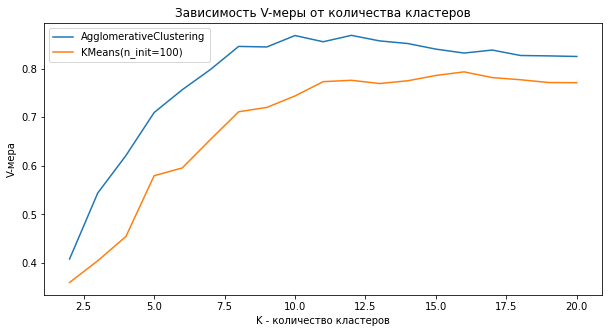

,AgglomerativeClustering,KMeans(n_init=100)
2,0.408242,0.360012
3,0.544061,0.404609
4,0.621164,0.454648
5,0.709654,0.579623
6,0.756666,0.595725
7,0.798301,0.654272
8,0.845777,0.711265
9,0.844660,0.720241
10,0.868170,0.743838
11,0.855380,0.773269


In [9]:
df = pd.DataFrame(np.transpose(score), columns=['AgglomerativeClustering','KMeans(n_init=100)']).iloc[2:, :]
df.head(50)
df.plot(figsize =(10,5), title ='Зависимость V-меры от количества кластеров', xlabel = 'K - количество кластеров', ylabel = 'V-мера')
plt.show()
df.head(50)

При количестве кластеров от 10 до 16-17 достигаются макимальные значения v-меры.

# 3. Снижение размерности признакового пространства

Иногда, особенно когда признаков много и не все они одинаково информативные, бывает полезно снизить размерность признакового пространства, то есть вместо $d$ исходных признаков перейти к рассмотрению $d' \ll d$ новых признаков. Данные были представлены матрицей $n$ наблюдений $\times$ $d$ исходных признаков, а теперь будут представлены матрицей $n$ наблюдений $\times$ $d'$ новых признаков.

Есть два популярных подхода к снижению размерности:
- отобрать (select) новые признаки из числа имеющихся;
- извлечь (extract) новые признаки, преобразуя старые, например, сделать $d'$ различных линейных комбинаций столбцов исходной матрицы $n \times d$.

Одним из широко используемых методов извлечения признаков является сингулярное разложение матрицы (singular value decomposition, SVD). Этот метод позволяет сконструировать любое число $d' \le d$ новых признаков таким образом, что они будут, в определённом смысле, максимально информативными. Математические детали сейчас не важны; познакомиться с ними можно, например, [здесь](https://www.coursera.org/learn/mathematics-and-python/lecture/L9bCV/razlozhieniia-matrits-v-proizviedieniie-singhuliarnoie-razlozhieniie)
(по-русски) или [здесь](https://www.youtube.com/watch?v=P5mlg91as1c) (по-английски).

В scikit-learn есть несколько реализаций сингулярного разложения. Мы будем использовать класс `TruncatedSVD` из подмодуля `decomposition`. В конструктор этого класса достаточно передать один параметр `n_components` – желаемое число новых признаков. Метод `fit_transform` принимает матрицу и возвращает новую матрицу с таким же количеством строк, как прежде, и количеством столбцов, равным числу новых признаков.

<u>Замечание:</u> Сингулярное разложение матрицы $M$ обычно пишут в виде $M = U \Sigma V^{*}$, где $U$, $\Sigma$ и $V$ – некие матрицы с хорошими свойствами. То, что возвращает алгоритм `TruncatedSVD`, – это сколько-то (сколько мы хотим получить) первых столбцов матрицы $U$.

**(1.5 балла)** Выполните сингулярное разложение матрицы `X`, оставляя 2, 5, 10, 20 признаков. В каждом случае выполните иерархическую и $K$-means кластеризацию преобразованных данных (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли при каком-нибудь $d'$ получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [10]:
from sklearn.decomposition import TruncatedSVD
components_set = (2, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60, 63)

l = len(components_set)
k = 10
score = np.empty((l,4))  
for i, n_comp in zip(range(l), components_set):
    x_n = np.empty((1797, n_comp)) 
    svd = TruncatedSVD(n_components = n_comp)
    x_n = svd.fit_transform(x)
    est1 = AgglomerativeClustering(n_clusters=k)
    est2 = KMeans(n_clusters=k, n_init=100,init='random')
    est1.fit(x_n)
    est2.fit(x_n)
    labels1 = est1.labels_
    labels2 = est2.labels_
    score[i][0] = silhouette_score(x_n, labels1)
    score[i][1] = silhouette_score(x_n, labels2)
    
    y1 = est1.fit_predict(x_n)
    y2 = est2.fit_predict(x_n)
    score[i][2] = v_measure_score(y, y1)
    score[i][3] = v_measure_score(y, y2)

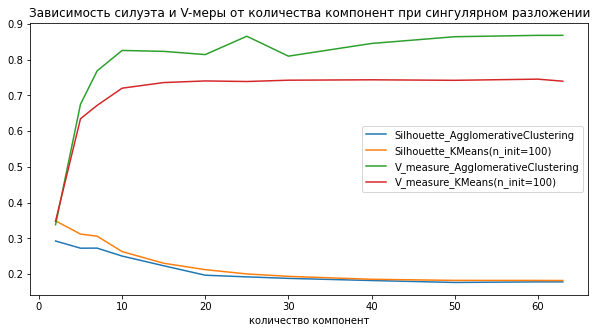

,Silhouette_AgglomerativeClustering,Silhouette_KMeans(n_init=100),V_measure_AgglomerativeClustering,V_measure_KMeans(n_init=100)
2,0.292815,0.349183,0.338494,0.348426
5,0.272741,0.312153,0.675604,0.634967
7,0.272899,0.306346,0.768762,0.672265
10,0.250715,0.263224,0.825975,0.720355
15,0.223590,0.230594,0.823366,0.736090
20,0.197136,0.212682,0.814388,0.740639
25,0.192478,0.200657,0.865670,0.739051
30,0.188291,0.193893,0.810007,0.742709
40,0.182260,0.185743,0.845481,0.743838
50,0.176886,0.182631,0.864358,0.742410


In [11]:
df = pd.DataFrame(score, columns=['Silhouette_AgglomerativeClustering','Silhouette_KMeans(n_init=100)', 
                                  'V_measure_AgglomerativeClustering','V_measure_KMeans(n_init=100)'], index = components_set) 
df.plot(figsize =(10,5), title ='Зависимость силуэта и V-меры от количества компонент при сингулярном разложении', xlabel = 'количество компонент')
plt.show()
df.head(50)

При количестве компонент до 20 получить 𝑉 -меру лучше, чем на исходных данных не удалось. При 20-25 компонентах значения v-меры приближаюся к значениям на исходном наборе признаков. При 60 компонентах практически те же либо незначительно превышают исходные.  
Значения силуэта наоборот при малом количестве компонент (2-10) значительно превышают исходные, при 30-40  приближаются к исходным.

Другая популярная техника снижения размерности, которая особенно хорошо подходит для работы с картинками, – это алгоритм t-distributed stochastic neighbor embeddings, сокращённо tSNE. В отличие от сингулярного разложения, это преобразование нелинейное. Его основная идея – отобразить точки из пространства размерности $d$ в пространство размерности 2 или 3 (обычно 2, то есть на плоскость) таким образом, чтобы как можно точнее сохранить расстояния. Математические детали есть, например, [здесь](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding), но они нетривиальны.

В библиотеке scikit-learn реализацией tSNE является класс `TSNE` в подмодуле `manifold`. В конструктор можно передать параметр `n_components`, а можно и не передавать: по умолчанию он равен 2. Метод `fit_transform` работает аналогично тому, как и у `TruncatedSVD`.

<u>Замечание:</u> В последние годы вместо tSNE на практике часто используется [UMAP](https://github.com/lmcinnes/umap), более быстрый алгоритм с похожими свойствами. В этой лабораторной работе не предлагается использовать UMAP, так как это потребовало бы установить ещё одну зависимость -- библиотеку `umap-learn`. Желающие могут проделать задания на tSNE с использованием UMAP; в этом случае обратите внимание на параметры `n_neighbors` и `min_dist`, которыми определяется вид проекции.

**(0.5 балла)** Выполните tSNE-преобразование матрицы `X`, оставив 2 признака. Визуализируйте данные, преобразованные таким образом, в виде точечной диаграммы: первый признак вдоль горизонтальной оси, второй признак вдоль вертикальной оси. Подсветите разными цветами группы точек, соответствующих разным цифрам.

*Указания:*
- Точечную диаграмму умеет рисовать функция `plt.scatter`. Ознакомьтесь со справкой к ней.
- За цвета точек отвечает параметр `c` у функции `plt.scatter`. Передать в него надо истинные метки классов.

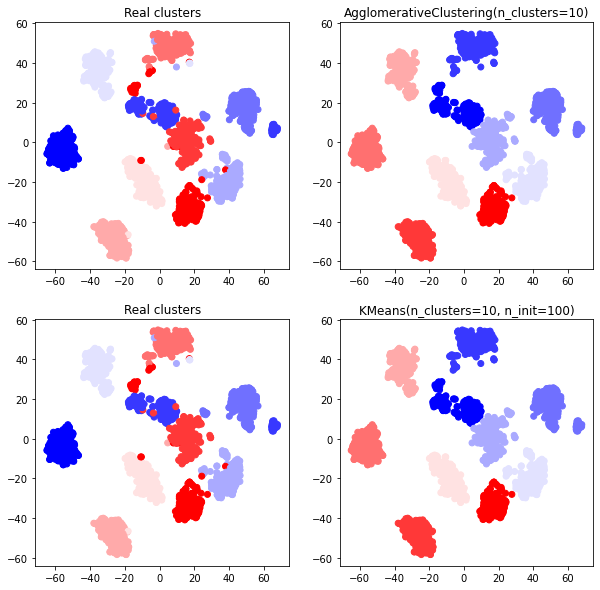

In [12]:
from sklearn.manifold import TSNE
k=10
n_comp = 2
x_n = np.empty((1797, n_comp)) 
tsne = TSNE(n_components = n_comp)
x_n = tsne.fit_transform(x)
est1 = AgglomerativeClustering(n_clusters=k)
est2 = KMeans(n_clusters=k, n_init=100,init='random')
est1.fit(x_n)
est2.fit(x_n)
labels1 = est1.labels_
labels2 = est2.labels_
   
y1 = est1.fit_predict(x_n)
y2 = est2.fit_predict(x_n)


fig, axes = plt.subplots(2, 2)

axes[0][0].scatter(x_n[:, 0], x_n[:, 1], c=y, cmap='bwr')
axes[0][0].set_title('Real clusters')



axes[0][1].scatter(x_n[:, 0], x_n[:, 1], c=y1, cmap='bwr')
axes[0][1].set_title('AgglomerativeClustering(n_clusters=10)')


axes[1][0].scatter(x_n[:, 0], x_n[:, 1], c=y, cmap='bwr')
axes[1][0].set_title('Real clusters')

axes[1][1].scatter(x_n[:, 0], x_n[:, 1], c=y1, cmap='bwr')
axes[1][1].set_title('KMeans(n_clusters=10, n_init=100)')



fig.set_figwidth(10)     
fig.set_figheight(10)   
plt.show()

**(1 балл)** Для tSNE-преобразованных данных с 2 признаками выполните иерархическую и $K$-means кластеризацию (число кластеров примите равным 10). Посчитайте значения силуэта и $V$-меры. Удалось ли получить силуэт и / или $V$-меру лучше, чем на исходных данных?

In [13]:
from sklearn.manifold import TSNE
components_set = (2, 3)

l = len(components_set)
k = 10
score = np.empty((l,4))  
for i, n_comp in zip(range(l), components_set):
    x_n = np.empty((1797, n_comp)) 
    tsne = TSNE(n_components = n_comp)
    x_n = tsne.fit_transform(x)
    est1 = AgglomerativeClustering(n_clusters=k)
    est2 = KMeans(n_clusters=k, n_init=100,init='random')
    est1.fit(x_n)
    est2.fit(x_n)
    labels1 = est1.labels_
    labels2 = est2.labels_
    score[i][0] = silhouette_score(x_n, labels1)
    score[i][1] = silhouette_score(x_n, labels2)
    
    y1 = est1.fit_predict(x_n)
    y2 = est2.fit_predict(x_n)
    score[i][2] = v_measure_score(y, y1)
    score[i][3] = v_measure_score(y, y2)

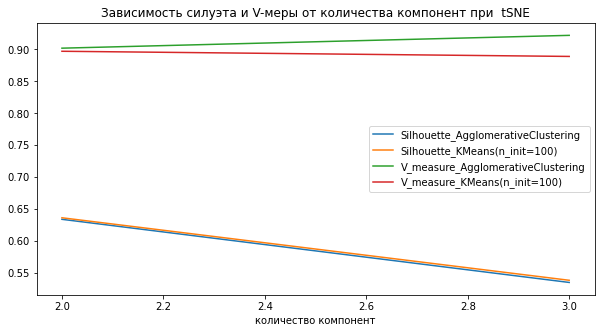

,Silhouette_AgglomerativeClustering,Silhouette_KMeans(n_init=100),V_measure_AgglomerativeClustering,V_measure_KMeans(n_init=100)
2,0.634110,0.636541,0.901925,0.897079
3,0.535326,0.538715,0.921980,0.889006


In [14]:
df = pd.DataFrame(score, columns=['Silhouette_AgglomerativeClustering','Silhouette_KMeans(n_init=100)', 
                                  'V_measure_AgglomerativeClustering','V_measure_KMeans(n_init=100)'], index = components_set) 
df.plot(figsize =(10,5), title ='Зависимость силуэта и V-меры от количества компонент при  tSNE', xlabel = 'количество компонент')
plt.show()
df.head(50)

 Для tSNE-преобразованных данных с 2-мя и 3-мя для иерархической и  𝐾 -means кластеризациию удалось получить силуэт и 𝑉 -меру лучше, чем на исходных данных. 
 Лучшее разбиение (после многократного повторения вычислений) согласно   𝑉 -меры является дает tSNE-преобразование данных с 2-мя компонентами и последующая иерархическая кластеризация

In [15]:
n = 2
k = 10
n_comp = 2
x_n = np.empty((1797, n_comp)) 
tsne = TSNE(n_components = n_comp)
x_n = tsne.fit_transform(x)
est1 = AgglomerativeClustering(n_clusters=k)
est1.fit(x_n)
labels1 = est1.labels_
y1 = est1.fit_predict(x_n)

**(0.5 балла)** Для самого лучшего разбиения, которое вам удалось получить (на ваше усмотрение, лучшего в терминах силуэта или $V$-меры), опять визуализируйте картинками центры кластеров. Удалось ли добиться, чтобы каждый кластер соответствовал какой-нибудь одной цифре?

полученные кластеры [5 0 3 ... 3 9 3]
реальные кластеры [0 1 2 ... 8 9 8]


<Figure size 432x288 with 0 Axes>

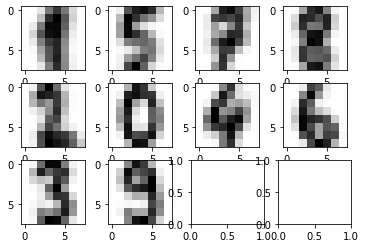

In [16]:
print('полученные кластеры',y1)
print('реальные кластеры',y)
cluster_mean = np.empty((10, 64))
for cluster_n in range(10):
    cluster_matrix = np.dot(np.diag(y1 == cluster_n), x) 
    cluster_mean[cluster_n] = cluster_matrix.mean(axis = 0)
digits_plot(cluster_mean)    

Исходя из полученных изображений, каждый центр кластеров соответствует какой-нибудь одной цифре.
Построим гистограммы распределение реальных классов изображений в  каждом полученном кластере.

In [17]:
y_best = y1 + 1
y_real = y + 1
cluster_real = np.empty((10, 1797))
for cluster_n in range(10):
    cluster_vector = np.dot(np.diag(y_best == (cluster_n + 1)), y_real) 
    cluster_real[cluster_n] = cluster_vector


cluster_real = cluster_real - 1    
import pandas as pd
df = pd.DataFrame(cluster_real.reshape(-1,10))

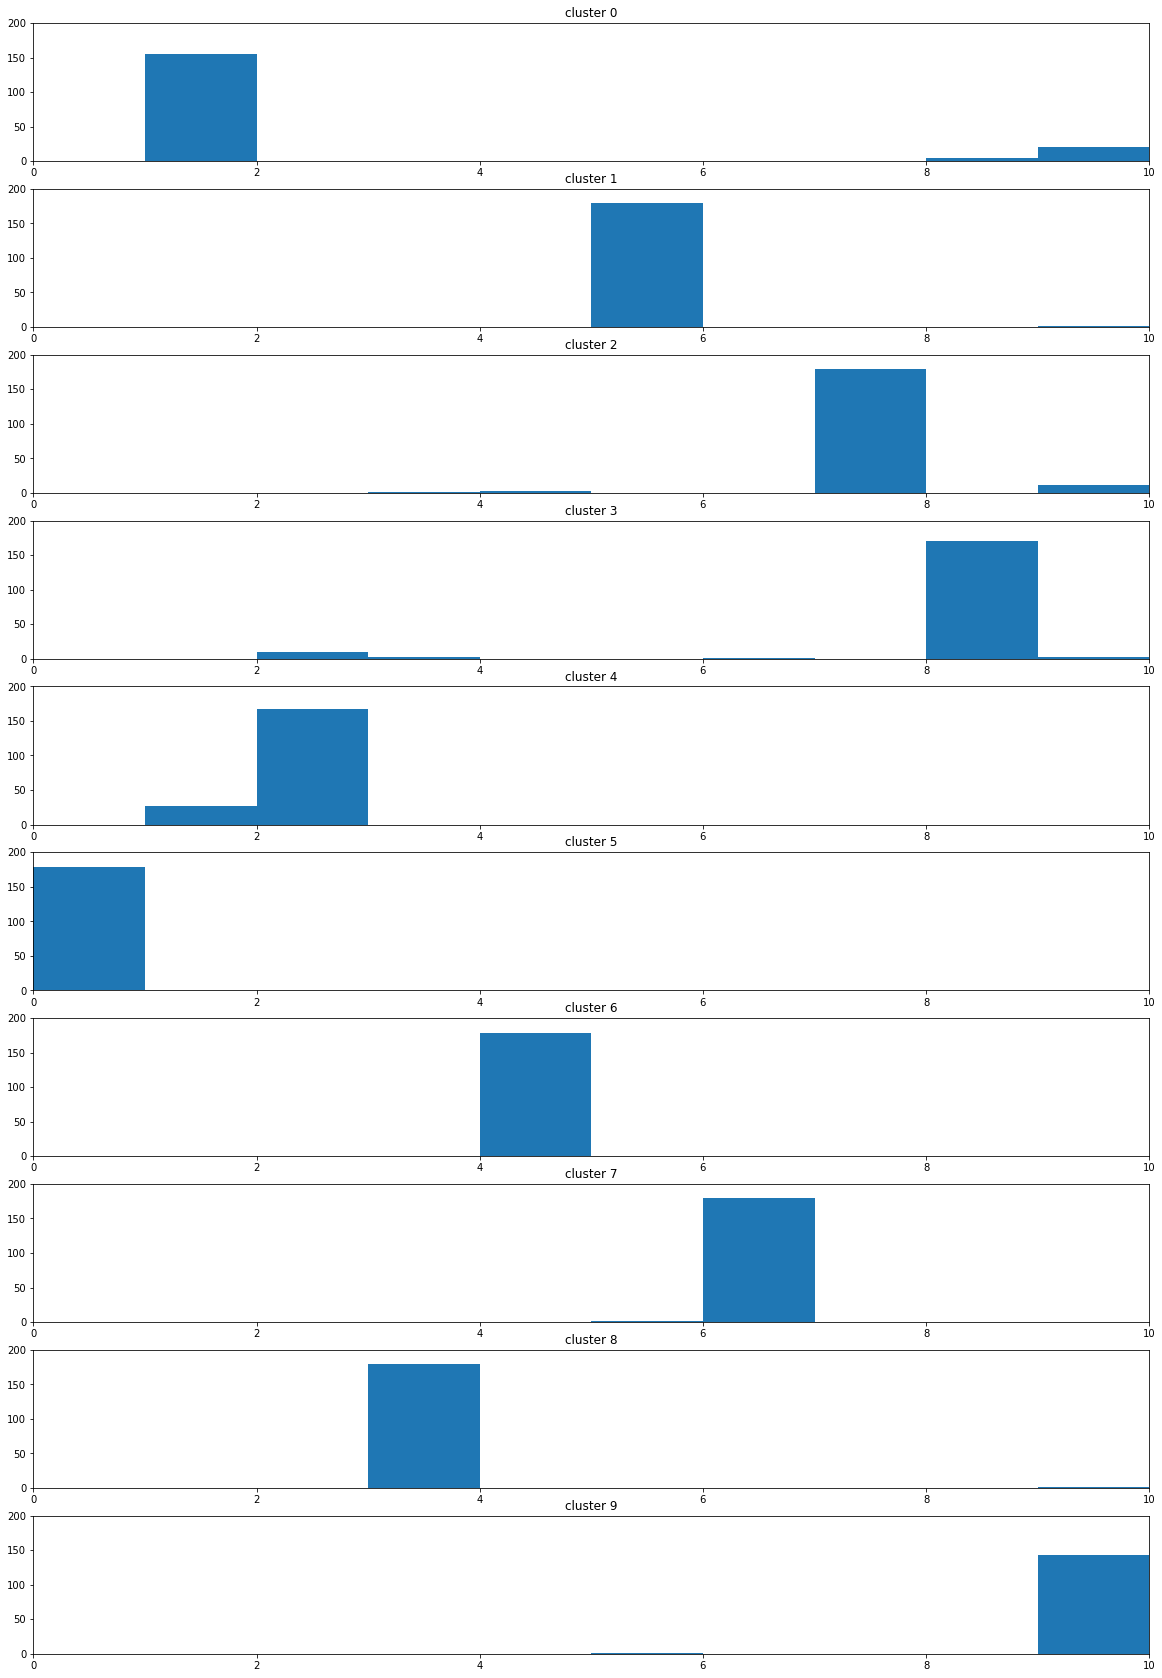

In [18]:
fig, axes = plt.subplots(10, figsize=(20,30))
for cluster_n in range(10):
    axes[cluster_n].set(title = f'cluster {cluster_n}', xlim = [0, 10], ylim = [0, 200])
    axes[cluster_n].hist(cluster_real[cluster_n, :], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

На гистограммах видно,  что полученные кластеры  соответствуют исходным. Однако в некоторых из них значительное количесство неверно определенных цифр.



# 4. Итоги, бонус

**(1 балл)** Напишите в свободной форме, какие выводы вы сделали из выполненной работы. Ответьте, как минимум, на следующие два вопроса:
- Какой из двух методов даёт более осмысленные кластеры – иерархическая кластеризация или алгоритм $K$ средних? Зависит ли это от настроек каждого алгоритма? От критериев оценивания качества?
- Удаётся ли улучшить качество кластеризации, снижая размерность признакового пространства?

Из полученных результатов видно, что иерархическая кластеризация дает лучшие результаты чем  метод  𝐾  средних как согласно V-мере (более объективной оценке, использующей реальные кластеры), так и согласно силуэту.

Для обоих методов наилучшие результаты достигаются при количестве кластеров приблизительно равном реальному либо  превосходящем его, но не более чем вдвое.
Иерархическая кластеризация даёт более осмысленные кластеры, позволяет с помощью дедограммы оценить их степень близости и предположить реальное количество кластеров.
Метод  𝐾  средних сильно зависим от выбранных случайно начальных точек и требует многократного повторения для усреднения результатов.
Снижая размерность признакового пространства с использованием алгоритма tSNE удалось улучшить качество кластеризации как для иерархической кластеризации, так и для  метода  𝐾  средних. С использованием tSNE оба алгоритма имют близкие оценки качества.
Использование сингулярного разложения матрицы не привело к улучшению качества кластеризации.


**(Бонусные 2 балла)** Скачайте датасет [MNIST Handwritten Digits](http://yann.lecun.com/exdb/mnist). Как сделать это с помощью scikit-learn, написано [здесь](http://scikit-learn.org/stable/datasets/index.html#downloading-datasets-from-the-mldata-org-repository). MNIST Handwritten Digits – это 70 тысяч распознанных рукописных изображений цифр, каждое размером 28 $\times$ 28 пикселей. Попробуйте прокластеризовать этот датасет и добиться как можно лучших значений силуэта и $V$-меры.